In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import math

In [141]:
data = pd.read_csv("./data from book/Wage.csv")

data['maritl'] = data['maritl'].apply(lambda x:int(x[0]))
data['race'] = data['race'].apply(lambda x:int(x[0]))
data['region'] = data['region'].apply(lambda x:int(x[0]))
data['jobclass'] = data['jobclass'].apply(lambda x:int(x[0]))
data['health'] = data['health'].apply(lambda x:int(x[0]))
data['year'] = data['year'].apply(lambda x:int(int(x)-2004))



x_data = np.array(data[["year","age","maritl","race","region","jobclass","health"]])
y_data = np.array(data["wage"])
x_test = x_data[300:400]
y_test = y_data[300:400]
x_data = x_data[0:300]
y_data = y_data[0:300]
sample_size = x_data.shape[0]
test_size = x_test.shape[0]

x_data

array([[ 2, 18,  1, ...,  2,  1,  1],
       [ 0, 24,  1, ...,  2,  2,  2],
       [-1, 45,  2, ...,  2,  1,  1],
       ...,
       [-1, 58,  1, ...,  2,  2,  1],
       [ 1, 27,  2, ...,  2,  1,  2],
       [ 5, 52,  5, ...,  2,  1,  2]], dtype=int64)

In [142]:
def min__j(x_data,y_data,w,b):
    j= 0
    for i in range(x_data.shape[0]):
        j+=(np.dot(x_data[i],w)+b- (y_data[i]))**2
    ghj = (2*x_data.shape[0])
    return j/ghj

In [143]:

def gradient(x_data,y_data, w, b):
    j_i = np.zeros(w.shape[0])
    j_j = 0
    m = x_data.shape[0]
    for i in range(x_data.shape[0]):
        k = (np.dot(x_data[i],w)+b- (y_data[i]))
        if(math.isnan(k)==True):
            # print("k is NA")
            pass
        for gb in range(w.shape[0]): 
            j_i[gb] += (k*x_data[i][gb])
        
        j_j += k
     
    grad = [1/m * j_i, 1/m * j_j]
    return grad

In [144]:
# fixing learning rate
fix = []

In [145]:
def gradient_descent(x_data,y_data,w,b):
    dist = 0.0009
    hist =[]
    count =0
    iter = 5000
    for i in range(iter):
        count +=1
        dj_dw,dj_db =  gradient(x_data,y_data,w,b)


        w = w-(dist*dj_dw)
        b = b-(dist*dj_db)

        value_j = min__j(x_data,y_data,w,b)
        fix.append([i,value_j])
        if i ==iter-1 or i==0 or i%10 ==0:
            print(w,b,"-------------------------------- j: ",value_j,"dj_dw: ",dj_dw,"dj_db: ",dj_db)
      
    return w,b


In [146]:
def predict_graph(x_data,w,b):
    # pred = np.zeros([x_data.shape[0],])
    pred = np.zeros([x_data.shape[0]])
    for i in range(test_size):
        pred[i] = np.dot(x_data[i],w) +b
    return pred

In [147]:
# w = np.zeros([5])
w = np.zeros(x_data.shape[1])

b=0
per_w,per_b = gradient_descent(x_data,y_data,w,b)
print(per_w, per_b)


[0.18388374 4.33233322 0.19575516 0.13341874 0.19843196 0.14856784
 0.17400675] 0.09921597967601212 -------------------------------- j:  4742.001089929982 dj_dw:  [ -204.31527182 -4813.703579    -217.50573668  -148.24304871
  -220.47995484  -165.07538215  -193.34083674] dj_db:  -110.23997741779124
[0.20856125 2.57677928 0.17343089 0.1776544  0.22317579 0.1892686
 0.23292672] 0.11158789297028375 -------------------------------- j:  1106.3267616240469 dj_dw:  [ -28.25230931 -444.23506027  -25.55422202  -23.13061984  -30.47336557
  -24.95716633  -30.31563952] dj_db:  -15.236682784866009
[0.29276904 2.39439659 0.21943953 0.26553606 0.31514572 0.27938886
 0.34924221] 0.15757286028398607 -------------------------------- j:  1068.8574376700037 dj_dw:  [-11.5592697  -39.0403827   -7.6791659  -11.39406032 -12.7396651
 -11.8645932  -15.07278497] dj_db:  -6.369832548548175
[0.37928109 2.35822768 0.27113064 0.35627378 0.41234771 0.37321777
 0.46977549] 0.2061738560326397 --------------------------

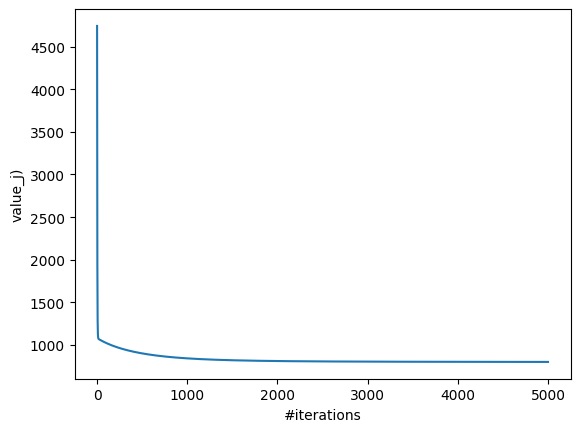

In [148]:
fix = np.array(fix)
pl.plot(fix[:,0], fix[:,1])
pl.xlabel("#iterations")
pl.ylabel("value_j)")
pl.show()

In [153]:
def show_predictions(x_test,y_test,per_w,per_b):
    print(per_w,per_b)
    pred = predict_graph(x_test,per_w,per_b)
    print(" year","age","maritl","race","region","jobclass","health")
    for i in range(test_size):
        print(x_test[i],"       ",round(pred[i],3),y_test[i]) 


show_predictions(x_test,y_test,per_w,per_b)


[ 1.76525548  0.67477361  2.44608272  4.44262297 10.04738957 10.91475644
 15.2957705 ] 5.023694782685169
 year age maritl race region jobclass health
[-1 45  2  1  2  1  2]         104.559 41.0998036301194
[-1 22  1  1  2  2  2]         97.508 68.3956538035455
[ 1 25  1  1  2  1  1]         76.852 81.2832532842527
[ 0 25  1  1  2  1  2]         90.383 73.7757432746946
[ 1 41  2  2  2  1  2]         109.833 130.982177377461
[ 2 54  5  1  2  1  2]         123.266 148.413159102577
[ 3 23  2  1  2  1  2]         96.775 81.226746312023
[ 2 36  1  1  2  1  2]         101.336 63.1888610037461
[ 0 31  5  1  2  1  1]         88.92 94.0727147457005
[ 2 52  2  1  2  2  1]         110.197 92.6581301668597
[ 3 46  2  2  2  2  1]         112.357 76.8936025176112
[ 3 45  2  1  2  1  1]         96.324 118.884359339886
[ 5 40  2  1  2  1  1]         96.481 79.8549003093467
[ 0 33  1  3  2  2  2]         115.581 86.6951548289402
[ 3 42  2  1  2  2  2]         120.511 133.971500070695
[ 3 41  2  1  2  2 

In [150]:
def accuracy(x_test,y_test,w,b,):
    pred = predict_graph(x_test,w,b)
    error = 0
    for i in range(pred.shape[0]):
        error += abs(y_test[i] - pred[i])/y_test[i]

    # t =np.sum(y_test)
    # k = np.sum(pred)
    error /= y_test.shape[0]  
    error *= 100
    return error

In [151]:
print(per_w,per_b)

[ 1.76525548  0.67477361  2.44608272  4.44262297 10.04738957 10.91475644
 15.2957705 ] 5.023694782685169


In [155]:
print("error:",accuracy(x_test, y_test,per_w,per_b),"%")
# pred = predict(X,per_w,per_b)
# print('Train Accuracy: %f'%(np.mean(pred == y_train) * 100))

error: 32.22146581263068 %
